In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


In [24]:
farms_data = pd.read_csv('combined_verified_data/merged_verified_files.csv')

In [25]:
farms_data.head()

,name,website,main_category,categories,phone,address,link,latitude,longitude,animal_type,geometry,country,state,department,coordinates
0,lapin et compagnie HBE,http://www.lapinetcompagnie.com/,cattle_farm,"['cattle_farm', 'livestock_breeder']",+33 6 67 10 92 73,"lapin et compagnie HBE, 26 Les Guerches, 35520...",https://www.google.com/maps/place/lapin+et+com...,48.202127,-1.694805,cows,POINT (-1.694804599999999 48.2021266),France,Bretagne,Ille-et-Vilaine,"48.2021266,-1.694804599999999"
1,Ferme de Surminette,https://surminette.fr/,cattle_farm,['cattle_farm'],+33 6 16 56 76 79,"Ferme de Surminette, Surminette, 35140 Saint-H...",https://www.google.com/maps/place/Ferme+de+Sur...,48.345371,-1.397706,cows,POINT (-1.3977055 48.3453709),France,Bretagne,Ille-et-Vilaine,"48.3453709,-1.3977055"
2,"Vente de Viande de boeuf Rennes, La ferme de l...",https://lafermedelabergerie.fr/,cattle_farm,['cattle_farm'],+33 6 88 63 39 23,"Vente de Viande de boeuf Rennes, La ferme de l...",https://www.google.com/maps/place/Vente+de+Via...,47.796614,-1.716564,cows,POINT (-1.7165644 47.7966142),France,Bretagne,Ille-et-Vilaine,"47.7966142,-1.7165644"
3,The Poultry Monthelon,NaN,poultry_farm,['poultry_farm'],+33 2 99 62 54 47,"The Poultry Monthelon, Le Petit Monthelon, 356...",https://www.google.com/maps/place/The+Poultry+...,48.138156,-1.554184,poultry,POINT (-1.5541838 48.138156099999996),France,Bretagne,Ille-et-Vilaine,"48.1381561,-1.5541838"
4,Chene Harel Earl,NaN,pig_farm,['pig_farm'],+33 2 99 13 20 49,"Chene Harel Earl, Le Mesnil l'abbaye, 35520 Me...",https://www.google.com/maps/place/Ch%C3%AAne+H...,48.210938,-1.678127,pigs,POINT (-1.6781268 48.2109376),France,Bretagne,Ille-et-Vilaine,"48.2109376,-1.6781268"


In [26]:
labs_data = pd.read_csv('combined_verified_data_lab/combined_verified_lab_files.csv')
labs_data.head()

,name,website,main_category,categories,phone,address,coordinates,link,latitude,longitude,geometry,country,state,department
0,f+p | GESUND BEWEGEN - Diagnostik,https://fp-gesundbewegen.de/leistung/diagnostik,diagnostic_center,['diagnostic_center'],0831 697246980,"f+p | GESUND BEWEGEN - Diagnostik, Lindauer St...","47.717189,10.294658",https://www.google.com/maps/place/f%2Bp+%7C+GE...,47.717189,10.294658,POINT (10.294658 47.717189),Germany,Bayern,Kempten (Allgäu)
1,MVZ Pruner Gang,http://www.mvz.sh/,diagnostic_center,['diagnostic_center'],0431 260800,"MVZ Pruner Gang, Pruner Gang 16 - 20, 24103 Kiel","54.320057899999995,10.1261765",https://www.google.com/maps/place/MVZ+Pr%C3%BC...,54.320058,10.126176,POINT (10.1261765 54.320057899999995),Germany,Schleswig-Holstein,Kiel
2,fabmedica,http://www.fabmedica.de/,diagnostic_center,['diagnostic_center'],0172 7057797,"fabmedica, Bergisch Gladbacher Str. 576, 51067...","50.9697915,7.0462503",https://www.google.com/maps/place/fabmedica/da...,50.969791,7.046250,POINT (7.0462503 50.9697915),Germany,Nordrhein-Westfalen,Köln
3,Schnelltest Zentrum Stuttgart / Esslingen - PC...,https://www.schnelltestzentrum-stuttgart.de/,diagnostic_center,['diagnostic_center'],0711 96880056,Schnelltest Zentrum Stuttgart / Esslingen - PC...,"48.7256863,9.3415935",https://www.google.com/maps/place/Schnelltest+...,48.725686,9.341594,POINT (9.3415935 48.7256863),Germany,Baden-Württemberg,Esslingen
4,Medizinisches Versorgungszentrum Labor Dr. Fen...,https://www.fennerlabor.de/,diagnostic_center,['diagnostic_center'],040 309550,Medizinisches Versorgungszentrum Labor Dr. Fen...,"53.5509029,9.9957652",https://www.google.com/maps/place/Medizinische...,53.550903,9.995765,POINT (9.9957652 53.5509029),Germany,Hamburg,Hamburg


In [27]:
labs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12662 entries, 0 to 12661
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           12662 non-null  object 
 1   website        8368 non-null   object 
 2   main_category  12662 non-null  object 
 3   categories     12662 non-null  object 
 4   phone          10968 non-null  object 
 5   address        12367 non-null  object 
 6   coordinates    12662 non-null  object 
 7   link           12662 non-null  object 
 8   latitude       12662 non-null  float64
 9   longitude      12662 non-null  float64
 10  geometry       12662 non-null  object 
 11  country        12662 non-null  object 
 12  state          12662 non-null  object 
 13  department     12662 non-null  object 
dtypes: float64(2), object(12)
memory usage: 1.4+ MB


In [28]:
# add a column to the labs_data dataframe called superclass and set it to 'lab' on every row
labs_data['superclass'] = 'lab'
labs_data.head()


,name,website,main_category,categories,phone,address,coordinates,link,latitude,longitude,geometry,country,state,department,superclass
0,f+p | GESUND BEWEGEN - Diagnostik,https://fp-gesundbewegen.de/leistung/diagnostik,diagnostic_center,['diagnostic_center'],0831 697246980,"f+p | GESUND BEWEGEN - Diagnostik, Lindauer St...","47.717189,10.294658",https://www.google.com/maps/place/f%2Bp+%7C+GE...,47.717189,10.294658,POINT (10.294658 47.717189),Germany,Bayern,Kempten (Allgäu),lab
1,MVZ Pruner Gang,http://www.mvz.sh/,diagnostic_center,['diagnostic_center'],0431 260800,"MVZ Pruner Gang, Pruner Gang 16 - 20, 24103 Kiel","54.320057899999995,10.1261765",https://www.google.com/maps/place/MVZ+Pr%C3%BC...,54.320058,10.126176,POINT (10.1261765 54.320057899999995),Germany,Schleswig-Holstein,Kiel,lab
2,fabmedica,http://www.fabmedica.de/,diagnostic_center,['diagnostic_center'],0172 7057797,"fabmedica, Bergisch Gladbacher Str. 576, 51067...","50.9697915,7.0462503",https://www.google.com/maps/place/fabmedica/da...,50.969791,7.046250,POINT (7.0462503 50.9697915),Germany,Nordrhein-Westfalen,Köln,lab
3,Schnelltest Zentrum Stuttgart / Esslingen - PC...,https://www.schnelltestzentrum-stuttgart.de/,diagnostic_center,['diagnostic_center'],0711 96880056,Schnelltest Zentrum Stuttgart / Esslingen - PC...,"48.7256863,9.3415935",https://www.google.com/maps/place/Schnelltest+...,48.725686,9.341594,POINT (9.3415935 48.7256863),Germany,Baden-Württemberg,Esslingen,lab
4,Medizinisches Versorgungszentrum Labor Dr. Fen...,https://www.fennerlabor.de/,diagnostic_center,['diagnostic_center'],040 309550,Medizinisches Versorgungszentrum Labor Dr. Fen...,"53.5509029,9.9957652",https://www.google.com/maps/place/Medizinische...,53.550903,9.995765,POINT (9.9957652 53.5509029),Germany,Hamburg,Hamburg,lab


In [29]:
# add a column to the labs_data dataframe called superclass and set it to 'lab' on every row
farms_data['superclass'] = 'farm'
farms_data.head()

,name,website,main_category,categories,phone,address,link,latitude,longitude,animal_type,geometry,country,state,department,coordinates,superclass
0,lapin et compagnie HBE,http://www.lapinetcompagnie.com/,cattle_farm,"['cattle_farm', 'livestock_breeder']",+33 6 67 10 92 73,"lapin et compagnie HBE, 26 Les Guerches, 35520...",https://www.google.com/maps/place/lapin+et+com...,48.202127,-1.694805,cows,POINT (-1.694804599999999 48.2021266),France,Bretagne,Ille-et-Vilaine,"48.2021266,-1.694804599999999",farm
1,Ferme de Surminette,https://surminette.fr/,cattle_farm,['cattle_farm'],+33 6 16 56 76 79,"Ferme de Surminette, Surminette, 35140 Saint-H...",https://www.google.com/maps/place/Ferme+de+Sur...,48.345371,-1.397706,cows,POINT (-1.3977055 48.3453709),France,Bretagne,Ille-et-Vilaine,"48.3453709,-1.3977055",farm
2,"Vente de Viande de boeuf Rennes, La ferme de l...",https://lafermedelabergerie.fr/,cattle_farm,['cattle_farm'],+33 6 88 63 39 23,"Vente de Viande de boeuf Rennes, La ferme de l...",https://www.google.com/maps/place/Vente+de+Via...,47.796614,-1.716564,cows,POINT (-1.7165644 47.7966142),France,Bretagne,Ille-et-Vilaine,"47.7966142,-1.7165644",farm
3,The Poultry Monthelon,NaN,poultry_farm,['poultry_farm'],+33 2 99 62 54 47,"The Poultry Monthelon, Le Petit Monthelon, 356...",https://www.google.com/maps/place/The+Poultry+...,48.138156,-1.554184,poultry,POINT (-1.5541838 48.138156099999996),France,Bretagne,Ille-et-Vilaine,"48.1381561,-1.5541838",farm
4,Chene Harel Earl,NaN,pig_farm,['pig_farm'],+33 2 99 13 20 49,"Chene Harel Earl, Le Mesnil l'abbaye, 35520 Me...",https://www.google.com/maps/place/Ch%C3%AAne+H...,48.210938,-1.678127,pigs,POINT (-1.6781268 48.2109376),France,Bretagne,Ille-et-Vilaine,"48.2109376,-1.6781268",farm


In [30]:
# combine the two dataframes
combined_data = pd.concat([farms_data, labs_data])
combined_data.head()

,name,website,main_category,categories,phone,address,link,latitude,longitude,animal_type,geometry,country,state,department,coordinates,superclass
0,lapin et compagnie HBE,http://www.lapinetcompagnie.com/,cattle_farm,"['cattle_farm', 'livestock_breeder']",+33 6 67 10 92 73,"lapin et compagnie HBE, 26 Les Guerches, 35520...",https://www.google.com/maps/place/lapin+et+com...,48.202127,-1.694805,cows,POINT (-1.694804599999999 48.2021266),France,Bretagne,Ille-et-Vilaine,"48.2021266,-1.694804599999999",farm
1,Ferme de Surminette,https://surminette.fr/,cattle_farm,['cattle_farm'],+33 6 16 56 76 79,"Ferme de Surminette, Surminette, 35140 Saint-H...",https://www.google.com/maps/place/Ferme+de+Sur...,48.345371,-1.397706,cows,POINT (-1.3977055 48.3453709),France,Bretagne,Ille-et-Vilaine,"48.3453709,-1.3977055",farm
2,"Vente de Viande de boeuf Rennes, La ferme de l...",https://lafermedelabergerie.fr/,cattle_farm,['cattle_farm'],+33 6 88 63 39 23,"Vente de Viande de boeuf Rennes, La ferme de l...",https://www.google.com/maps/place/Vente+de+Via...,47.796614,-1.716564,cows,POINT (-1.7165644 47.7966142),France,Bretagne,Ille-et-Vilaine,"47.7966142,-1.7165644",farm
3,The Poultry Monthelon,NaN,poultry_farm,['poultry_farm'],+33 2 99 62 54 47,"The Poultry Monthelon, Le Petit Monthelon, 356...",https://www.google.com/maps/place/The+Poultry+...,48.138156,-1.554184,poultry,POINT (-1.5541838 48.138156099999996),France,Bretagne,Ille-et-Vilaine,"48.1381561,-1.5541838",farm
4,Chene Harel Earl,NaN,pig_farm,['pig_farm'],+33 2 99 13 20 49,"Chene Harel Earl, Le Mesnil l'abbaye, 35520 Me...",https://www.google.com/maps/place/Ch%C3%AAne+H...,48.210938,-1.678127,pigs,POINT (-1.6781268 48.2109376),France,Bretagne,Ille-et-Vilaine,"48.2109376,-1.6781268",farm


In [31]:
combined_data.value_counts('superclass')

superclass
farm    20384
lab     12662
Name: count, dtype: int64

In [32]:
# check for duplicates
combined_data.duplicated().sum()


0

In [33]:
# save the combined data to a csv file

combined_data.to_csv('labs_farms_combined.csv', index=False)

In [914]:
full_data = pd.read_csv('processed_data/france_cleaned4.csv')
np.random.seed(0)
full_data.head()

,name,website,main_category,categories,phone,owner,address,coordinates,link,latitude,longitude,animal_type,geometry,country,region,department
0,Aux Sources du Heimbach,https://www.sourcesduheimbach.fr/,fish_farm,['fish_farm'],+33 3 88 94 43 17,"{'id': '101275127743771916229', 'name': 'Aux S...","Aux Sources du Heimbach, 7 Rue des Vosges, 675...","{'latitude': 49.0258774, 'longitude': 7.8183023}",https://www.google.com/maps/place/Aux+Sources+...,49.025877,7.818302,fish,POINT (7.8183023 49.0258774),France,Grand Est,Bas-Rhin
1,Aquafarm Paradise,http://www.aquafarmparadise.fr/,shrimp_farm,['shrimp_farm'],+33 3 87 06 58 61,"{'id': '101917251081531421814', 'name': 'Aquaf...","Aquafarm Paradise, 22 Untermuhlthal, 57230 Bae...","{'latitude': 48.9498081, 'longitude': 7.548176...",https://www.google.com/maps/place/Aquafarm+Par...,48.949808,7.548177,fish,POINT (7.548176799999999 48.9498081),France,Grand Est,Moselle
2,Ferme Angus,https://fermeangus.fr/,cattle_farm,['cattle_farm'],+33 7 68 47 96 21,"{'id': '117415300266335370851', 'name': 'Ferme...","Ferme Angus, 11 bis Chem. des Haies, 59132 Tre...","{'latitude': 50.038103, 'longitude': 4.097875}",https://www.google.com/maps/place/Ferme+Angus/...,50.038103,4.097875,cows,POINT (4.097875 50.038103),France,Hauts-de-France,Nord
3,Folb Michael,NaN,cattle_farm,['cattle_farm'],NaN,"{'id': None, 'name': 'Folb Michael (Owner)', '...","Folb Michael, 7 Rue de la Haut, 59132 Wallers-...","{'latitude': 50.0628974, 'longitude': 4.1699834}",https://www.google.com/maps/place/Folb+Michael...,50.062897,4.169983,cows,POINT (4.1699834 50.0628974),France,Hauts-de-France,Nord
4,Lenclud jean Paul bio,NaN,cattle_farm,['cattle_farm'],NaN,"{'id': None, 'name': 'Lenclud jean Paul bio (O...","Lenclud jean Paul bio, 16 Rue de Beugnies, 597...","{'latitude': 50.151025, 'longitude': 4.026559}",https://www.google.com/maps/place/Lenclud+jean...,50.151025,4.026559,cows,POINT (4.026559 50.151025),France,Hauts-de-France,Nord


In [915]:
# change columns COUNTRY	NAME_1	NAME_2 to country, region, department
full_data = full_data.rename(columns={'region': 'state'})

In [916]:
full_data.head()

,name,website,main_category,categories,phone,owner,address,coordinates,link,latitude,longitude,animal_type,geometry,country,state,department
0,Aux Sources du Heimbach,https://www.sourcesduheimbach.fr/,fish_farm,['fish_farm'],+33 3 88 94 43 17,"{'id': '101275127743771916229', 'name': 'Aux S...","Aux Sources du Heimbach, 7 Rue des Vosges, 675...","{'latitude': 49.0258774, 'longitude': 7.8183023}",https://www.google.com/maps/place/Aux+Sources+...,49.025877,7.818302,fish,POINT (7.8183023 49.0258774),France,Grand Est,Bas-Rhin
1,Aquafarm Paradise,http://www.aquafarmparadise.fr/,shrimp_farm,['shrimp_farm'],+33 3 87 06 58 61,"{'id': '101917251081531421814', 'name': 'Aquaf...","Aquafarm Paradise, 22 Untermuhlthal, 57230 Bae...","{'latitude': 48.9498081, 'longitude': 7.548176...",https://www.google.com/maps/place/Aquafarm+Par...,48.949808,7.548177,fish,POINT (7.548176799999999 48.9498081),France,Grand Est,Moselle
2,Ferme Angus,https://fermeangus.fr/,cattle_farm,['cattle_farm'],+33 7 68 47 96 21,"{'id': '117415300266335370851', 'name': 'Ferme...","Ferme Angus, 11 bis Chem. des Haies, 59132 Tre...","{'latitude': 50.038103, 'longitude': 4.097875}",https://www.google.com/maps/place/Ferme+Angus/...,50.038103,4.097875,cows,POINT (4.097875 50.038103),France,Hauts-de-France,Nord
3,Folb Michael,NaN,cattle_farm,['cattle_farm'],NaN,"{'id': None, 'name': 'Folb Michael (Owner)', '...","Folb Michael, 7 Rue de la Haut, 59132 Wallers-...","{'latitude': 50.0628974, 'longitude': 4.1699834}",https://www.google.com/maps/place/Folb+Michael...,50.062897,4.169983,cows,POINT (4.1699834 50.0628974),France,Hauts-de-France,Nord
4,Lenclud jean Paul bio,NaN,cattle_farm,['cattle_farm'],NaN,"{'id': None, 'name': 'Lenclud jean Paul bio (O...","Lenclud jean Paul bio, 16 Rue de Beugnies, 597...","{'latitude': 50.151025, 'longitude': 4.026559}",https://www.google.com/maps/place/Lenclud+jean...,50.151025,4.026559,cows,POINT (4.026559 50.151025),France,Hauts-de-France,Nord


In [917]:
# save the data
full_data.to_csv('processed_data/france_cleaned4.csv', index=False)

In [2]:
full_data = pd.read_csv('combined_data/combined_farms_processed_files2.csv')
np.random.seed(0)
full_data.head()

/var/folders/kj/s6p553_17zxd38q2s490jgr80000gn/T/ipykernel_34560/2485634811.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  full_data = pd.read_csv('combined_data/combined_farms_processed_files2.csv')


,name,website,main_category,categories,phone,address,coordinates,link,latitude,longitude,animal_type,geometry,country,state,department,owner
0,Alma Bergsennerei Lutzenreute,http://www.bergsennerei-lutzenreute.at/,dairy_farm,['dairy_farm'],+43 5573 83380,"Alma Bergsennerei Lutzenreute, Lutzenreute 23,...","47.5475651,9.786284799999999",https://www.google.com/maps/place/Alma+Bergsen...,47.547565,9.786285,cows,POINT (9.786284799999999 47.5475651),Austria,Vorarlberg,Bregenz,NaN
1,Milkomat & Regionale Produkte 0-24h Verkaufsau...,http://www.heis.cc/,multiple,"['dairy_farm', 'dairy_farm']",NaN,Milkomat & Regionale Produkte 0-24h Verkaufsau...,"47.2691616,11.378884699999999",https://www.google.com/maps/place/Milkomat+%26...,47.269162,11.378885,other,POINT (11.378884699999999 47.2691616),Austria,Tirol,Innsbruck Stadt,NaN
2,Fischzucht Seeache & Partner OG,http://www.seeache.at/,fish_farm,['fish_farm'],+43 664 4342946,"Fischzucht Seeache & Partner OG, Oberburgau 49...","47.803245399999994,13.462789899999999",https://www.google.com/maps/place/Fischzucht+S...,47.803245,13.462790,fish,POINT (13.462789899999999 47.803245399999994),Austria,Salzburg,Salzburg-Umgebung,NaN
3,Sennerei Andelsbuch,https://sennerei-andelsbuch.at/,dairy_farm,['dairy_farm'],+43 5512 2507,"Sennerei Andelsbuch, Hof 366, 6866 Andelsbuch,...","47.4141386,9.8941143",https://www.google.com/maps/place/Sennerei+And...,47.414139,9.894114,cows,POINT (9.8941143 47.4141386),Austria,Vorarlberg,Bregenz,NaN
4,Fischerei Eckerstorfer,http://www.fischteich.biz/,fish_farm,['fish_farm'],+43 664 3212123,"Fischerei Eckerstorfer, Rading 10, 4190 Bad Le...","48.5485841,14.3254708",https://www.google.com/maps/place/Fischerei+Ec...,48.548584,14.325471,fish,POINT (14.3254708 48.5485841),Austria,Oberösterreich,Urfahr-Umgebung,NaN


In [10]:
full_data = pd.read_csv('combined_data_lab/combined_lab_processed_files.csv')
np.random.seed(0)
full_data.head()

,name,website,main_category,categories,phone,address,coordinates,link,latitude,longitude,geometry,country,state,department
0,f+p | GESUND BEWEGEN - Diagnostik,https://fp-gesundbewegen.de/leistung/diagnostik,diagnostic_center,['diagnostic_center'],0831 697246980,"f+p | GESUND BEWEGEN - Diagnostik, Lindauer St...","47.717189,10.294658",https://www.google.com/maps/place/f%2Bp+%7C+GE...,47.717189,10.294658,POINT (10.294658 47.717189),Germany,Bayern,Kempten (Allgäu)
1,MVZ Pruner Gang,http://www.mvz.sh/,diagnostic_center,['diagnostic_center'],0431 260800,"MVZ Pruner Gang, Pruner Gang 16 - 20, 24103 Kiel","54.320057899999995,10.1261765",https://www.google.com/maps/place/MVZ+Pr%C3%BC...,54.320058,10.126176,POINT (10.1261765 54.320057899999995),Germany,Schleswig-Holstein,Kiel
2,fabmedica,http://www.fabmedica.de/,diagnostic_center,['diagnostic_center'],0172 7057797,"fabmedica, Bergisch Gladbacher Str. 576, 51067...","50.9697915,7.0462503",https://www.google.com/maps/place/fabmedica/da...,50.969791,7.046250,POINT (7.0462503 50.9697915),Germany,Nordrhein-Westfalen,Köln
3,Schnelltest Zentrum Stuttgart / Esslingen - PC...,https://www.schnelltestzentrum-stuttgart.de/,diagnostic_center,['diagnostic_center'],0711 96880056,Schnelltest Zentrum Stuttgart / Esslingen - PC...,"48.7256863,9.3415935",https://www.google.com/maps/place/Schnelltest+...,48.725686,9.341594,POINT (9.3415935 48.7256863),Germany,Baden-Württemberg,Esslingen
4,Medizinisches Versorgungszentrum Labor Dr. Fen...,https://www.fennerlabor.de/,diagnostic_center,['diagnostic_center'],040 309550,Medizinisches Versorgungszentrum Labor Dr. Fen...,"53.5509029,9.9957652",https://www.google.com/maps/place/Medizinische...,53.550903,9.995765,POINT (9.9957652 53.5509029),Germany,Hamburg,Hamburg


In [3]:
full_data.columns

Index(['name', 'website', 'main_category', 'categories', 'phone', 'address',
       'coordinates', 'link', 'latitude', 'longitude', 'animal_type',
       'geometry', 'country', 'state', 'department', 'owner'],
      dtype='object')

In [4]:
full_data.tail()

,name,website,main_category,categories,phone,address,coordinates,link,latitude,longitude,animal_type,geometry,country,state,department,owner
74073,Toros aviles,NaN,pig_farm,['pig_farm'],NaN,"Toros aviles, Unnamed Road, 30812 Lorca, Murci...","37.914193399999995,-1.7614134",https://www.google.com/maps/place/Toros+aviles...,37.914193,-1.761413,pigs,POINT (-1.7614134 37.914193399999995),Spain,Región de Murcia,Murcia,NaN
74074,Granja Antonio Reinaldos,NaN,pig_farm,['pig_farm'],NaN,"Granja Antonio Reinaldos, 30890 Puerto Lumbrer...","37.557422599999995,-1.7796996999999999",https://www.google.com/maps/place/Granja+Anton...,37.557423,-1.779700,pigs,POINT (-1.7796996999999999 37.557422599999995),Spain,Región de Murcia,Murcia,NaN
74075,Avicola Tomas Fernandez S.L.,NaN,poultry_farm,['poultry_farm'],+34 968 53 27 17,"Avicola Tomas Fernandez S.L., Plaza Reina Mari...","37.6146884,-0.995095",https://www.google.com/maps/place/Av%C3%ADcola...,37.614688,-0.995095,poultry,POINT (-0.995095 37.6146884),Spain,Región de Murcia,Murcia,NaN
74076,Granja Tami,NaN,pig_farm,['pig_farm'],NaN,"Granja Tami, Ctra. del Campillo, 30320 Fuente ...","37.722758999999996,-1.1929383",https://www.google.com/maps/place/Granja+Tami/...,37.722759,-1.192938,pigs,POINT (-1.1929383 37.722758999999996),Spain,Región de Murcia,Murcia,NaN
74077,Granja A Tomas Perez sl,NaN,poultry_farm,['poultry_farm'],NaN,"Granja A Tomas Perez sl, RM-F21, 30708 Torre-P...","37.7779029,-0.9930363",https://www.google.com/maps/place/Granja+A+Tom...,37.777903,-0.993036,poultry,POINT (-0.9930363 37.7779029),Spain,Región de Murcia,Murcia,NaN


In [5]:
# combine the latitude and longitude columns into one column called coordinates2 which is a string of the form "latitude,longitude"
full_data['coordinates2'] = full_data['latitude'].astype(str) + ',' + full_data['longitude'].astype(str)
full_data.head()

,name,website,main_category,categories,phone,address,coordinates,link,latitude,longitude,animal_type,geometry,country,state,department,owner,coordinates2
0,Alma Bergsennerei Lutzenreute,http://www.bergsennerei-lutzenreute.at/,dairy_farm,['dairy_farm'],+43 5573 83380,"Alma Bergsennerei Lutzenreute, Lutzenreute 23,...","47.5475651,9.786284799999999",https://www.google.com/maps/place/Alma+Bergsen...,47.547565,9.786285,cows,POINT (9.786284799999999 47.5475651),Austria,Vorarlberg,Bregenz,NaN,"47.5475651,9.7862848"
1,Milkomat & Regionale Produkte 0-24h Verkaufsau...,http://www.heis.cc/,multiple,"['dairy_farm', 'dairy_farm']",NaN,Milkomat & Regionale Produkte 0-24h Verkaufsau...,"47.2691616,11.378884699999999",https://www.google.com/maps/place/Milkomat+%26...,47.269162,11.378885,other,POINT (11.378884699999999 47.2691616),Austria,Tirol,Innsbruck Stadt,NaN,"47.2691616,11.3788847"
2,Fischzucht Seeache & Partner OG,http://www.seeache.at/,fish_farm,['fish_farm'],+43 664 4342946,"Fischzucht Seeache & Partner OG, Oberburgau 49...","47.803245399999994,13.462789899999999",https://www.google.com/maps/place/Fischzucht+S...,47.803245,13.462790,fish,POINT (13.462789899999999 47.803245399999994),Austria,Salzburg,Salzburg-Umgebung,NaN,"47.803245399999994,13.4627899"
3,Sennerei Andelsbuch,https://sennerei-andelsbuch.at/,dairy_farm,['dairy_farm'],+43 5512 2507,"Sennerei Andelsbuch, Hof 366, 6866 Andelsbuch,...","47.4141386,9.8941143",https://www.google.com/maps/place/Sennerei+And...,47.414139,9.894114,cows,POINT (9.8941143 47.4141386),Austria,Vorarlberg,Bregenz,NaN,"47.4141386,9.8941143"
4,Fischerei Eckerstorfer,http://www.fischteich.biz/,fish_farm,['fish_farm'],+43 664 3212123,"Fischerei Eckerstorfer, Rading 10, 4190 Bad Le...","48.5485841,14.3254708",https://www.google.com/maps/place/Fischerei+Ec...,48.548584,14.325471,fish,POINT (14.3254708 48.5485841),Austria,Oberösterreich,Urfahr-Umgebung,NaN,"48.5485841,14.3254708"


In [6]:
df = full_data.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74078 entries, 0 to 74077
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           74078 non-null  object 
 1   website        23082 non-null  object 
 2   main_category  74078 non-null  object 
 3   categories     74078 non-null  object 
 4   phone          57323 non-null  object 
 5   address        73970 non-null  object 
 6   coordinates    74078 non-null  object 
 7   link           74078 non-null  object 
 8   latitude       74078 non-null  float64
 9   longitude      74078 non-null  float64
 10  animal_type    74078 non-null  object 
 11  geometry       74078 non-null  object 
 12  country        74078 non-null  object 
 13  state          74078 non-null  object 
 14  department     74078 non-null  object 
 15  owner          16264 non-null  object 
 16  coordinates2   74078 non-null  object 
dtypes: float64(2), object(15)
memory usage: 9.6+ MB


In [8]:
# drop coordinates column
df = df.drop(columns=['coordinates'])

# rename coordinates2 to coordinates
df = df.rename(columns={'coordinates2': 'coordinates'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74078 entries, 0 to 74077
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           74078 non-null  object 
 1   website        23082 non-null  object 
 2   main_category  74078 non-null  object 
 3   categories     74078 non-null  object 
 4   phone          57323 non-null  object 
 5   address        73970 non-null  object 
 6   link           74078 non-null  object 
 7   latitude       74078 non-null  float64
 8   longitude      74078 non-null  float64
 9   animal_type    74078 non-null  object 
 10  geometry       74078 non-null  object 
 11  country        74078 non-null  object 
 12  state          74078 non-null  object 
 13  department     74078 non-null  object 
 14  owner          16264 non-null  object 
 15  coordinates    74078 non-null  object 
dtypes: float64(2), object(14)
memory usage: 9.0+ MB


In [10]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:]

name                 0
website          50996
main_category        0
categories           0
phone            16755
address            108
link                 0
latitude             0
longitude            0
animal_type          0
geometry             0
country              0
state                0
department           0
owner            57814
coordinates          0
dtype: int64

In [11]:
# drop coordinates column
df = df.drop(columns=['owner'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74078 entries, 0 to 74077
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           74078 non-null  object 
 1   website        23082 non-null  object 
 2   main_category  74078 non-null  object 
 3   categories     74078 non-null  object 
 4   phone          57323 non-null  object 
 5   address        73970 non-null  object 
 6   link           74078 non-null  object 
 7   latitude       74078 non-null  float64
 8   longitude      74078 non-null  float64
 9   animal_type    74078 non-null  object 
 10  geometry       74078 non-null  object 
 11  country        74078 non-null  object 
 12  state          74078 non-null  object 
 13  department     74078 non-null  object 
 14  coordinates    74078 non-null  object 
dtypes: float64(2), object(13)
memory usage: 8.5+ MB


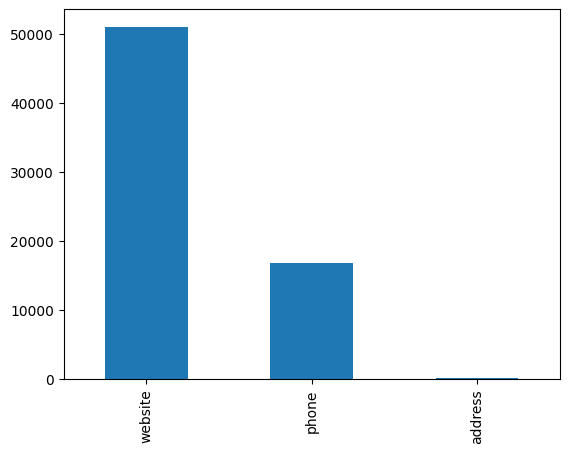

In [13]:
def plot_missing_values(df):
    # get the number of missing data points per column
    missing_values_count = df.isnull().sum()
    missing_values_count = missing_values_count[missing_values_count > 0]

    # plot the missing values
    missing_values_count.plot(kind="bar")
    plt.show()

plot_missing_values(df)

In [14]:
# function to calculate the percentage of missing values
def missing_values(df):
    missing_values_count = df.isnull().sum()
    # how many total missing values do we have?
    total_cells = np.prod(df.shape)
    total_missing = missing_values_count.sum()

    # percent of data that is missing
    percent_missing = (total_missing/total_cells) * 100
    
    return percent_missing

print(missing_values(df))

6.106986329724524


In [15]:
# function to calculate the percentage of duplicates in the data
def percentage_duplicates(df):
    return df.duplicated().sum() / len(df) * 100

# calculate the percentage of duplicates in the data
print(percentage_duplicates(df))

63.56003131834013


In [16]:
# number of duplicated values per column
duplicated_values_per_column = df.apply(lambda x: x.duplicated().sum())

print("Duplicated values per column:")
print(duplicated_values_per_column)


Duplicated values per column:
name             50706
website          67586
main_category    74070
categories       74004
phone            56404
address          50343
link             50203
latitude         50289
longitude        47229
animal_type      74073
geometry         47169
country          74070
state            73971
department       72817
coordinates      47223
dtype: int64


In [17]:
# replace all null values with np.nan
df.replace("", np.nan, inplace=True)
df.replace("None", np.nan, inplace=True)

# check for null values in all columns
null_counts = df.isnull().sum()
print("Null counts in each column:")
print(null_counts)

# remove all rows with at least one missing value in the "coordinates" column
df_with_na_dropped = df.dropna(subset=["coordinates"])

# remove all rows with at least one missing value in the "main_category" column
df.dropna(subset=["main_category"], inplace=True)

# calculate number of dropped rows
rows_in_original_dataset = df.shape[0]
rows_in_na_dropped = df_with_na_dropped.shape[0]
dropped_rows = rows_in_original_dataset - rows_in_na_dropped
print("Number of rows dropped due to missing values in 'coordinates' column:", dropped_rows)


Null counts in each column:
name                 0
website          50996
main_category        0
categories           0
phone            16755
address            108
link                 0
latitude             0
longitude            0
animal_type          0
geometry             0
country              0
state                0
department           0
coordinates          0
dtype: int64
Number of rows dropped due to missing values in 'coordinates' column: 0


In [18]:
# Count the number of duplicated rows in the specified column
duplicated_rows_in_column = df.duplicated(subset=["coordinates"]).sum()

print("Number of duplicated rows in column coordinates': {}".format(duplicated_rows_in_column))
initial_rows = df.shape[0]
df.drop_duplicates(subset=["coordinates"], inplace=True)
print("Number of rows dropped due to duplicates:", initial_rows - df.shape[0])

Number of duplicated rows in column coordinates': 47223
Number of rows dropped due to duplicates: 47223


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26855 entries, 0 to 70179
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           26855 non-null  object 
 1   website        7259 non-null   object 
 2   main_category  26855 non-null  object 
 3   categories     26855 non-null  object 
 4   phone          20467 non-null  object 
 5   address        26817 non-null  object 
 6   link           26855 non-null  object 
 7   latitude       26855 non-null  float64
 8   longitude      26855 non-null  float64
 9   animal_type    26855 non-null  object 
 10  geometry       26855 non-null  object 
 11  country        26855 non-null  object 
 12  state          26855 non-null  object 
 13  department     26855 non-null  object 
 14  coordinates    26855 non-null  object 
dtypes: float64(2), object(13)
memory usage: 3.3+ MB


In [21]:
# save the cleaned data to a new file
df.to_csv("combined_verified_data/combined_verified_farm_files.csv", index=False)

In [22]:
df.country.unique()

array(['Austria', 'Portugal', 'Belgium', 'Poland', 'France', 'Czechia',
       'Germany', 'Spain'], dtype=object)

In [23]:
df.country.value_counts()

country
France      15424
Spain        3898
Germany      3596
Poland       1811
Portugal      762
Belgium       575
Czechia       418
Austria       371
Name: count, dtype: int64

In [24]:
# number of duplicated values per column
duplicated_values_per_column = df.apply(lambda x: x.duplicated().sum())

print("Duplicated values per column:")
print(duplicated_values_per_column)

Duplicated values per column:
name              3491
website          20369
main_category    26847
categories       26781
phone             9186
address           3129
link              3063
latitude          3066
longitude            6
animal_type      26850
geometry             1
country          26847
state            26748
department       25594
coordinates          0
dtype: int64


In [135]:
# Count the number of duplicated rows in the specified column
duplicated_rows_in_column = df.duplicated(subset=["name"]).sum()

print("Number of duplicated rows in column coordinates': {}".format(duplicated_rows_in_column))
initial_rows = df.shape[0]
df.drop_duplicates(subset=["name"], inplace=True)
print("Number of rows dropped due to duplicates:", initial_rows - df.shape[0])

Number of duplicated rows in column coordinates': 1608
Number of rows dropped due to duplicates: 1608


In [136]:
# number of duplicated values per column
duplicated_values_per_column = df.apply(lambda x: x.duplicated().sum())

print("Duplicated values per column:")
print(duplicated_values_per_column)

Duplicated values per column:
name                0
website          2978
main_category    7769
categories       7768
phone            1804
address            74
coordinates         0
link                0
latitude            9
longitude           1
geometry            0
country          7769
state            7734
department       7301
dtype: int64


In [137]:
# save the cleaned data to a new file
df.to_csv("combined_verified_data_lab/combined_verified_lab_files.csv", index=False)

In [138]:
df.country.value_counts()

country
France     5875
Germany    1780
Austria     117
Name: count, dtype: int64

In [107]:
# read the data
df = pd.read_csv('verified_data/combined_verified_files.csv')

df.country.unique()

array(['Austria', 'Belgium', 'France', 'Czechia', 'Germany'], dtype=object)

In [108]:
df.country.value_counts()

country
France     15424
Germany     3596
Belgium      575
Czechia      418
Austria      371
Name: count, dtype: int64

In [109]:
# read the data
df = pd.read_csv('combined_verified_data/merged_verified_files.csv')

df.country.unique()

array(['France', 'Germany', 'Austria', 'Belgium', 'Czechia'], dtype=object)

In [110]:
df.country.value_counts()

country
France     15424
Germany     3596
Belgium      575
Czechia      418
Austria      371
Name: count, dtype: int64

In [111]:
# read the data
df = pd.read_csv('verified_data/cleaned_germany_france2.csv')

df.country.unique()

array(['France', 'Germany'], dtype=object)

In [112]:
df.country.value_counts()

country
France     15424
Germany     3596
Name: count, dtype: int64

In [114]:
# read the data
df = pd.read_csv('verified_data/cleaned_germany_france_cze_austria_belgium3.csv')

df.country.unique()

array(['Austria', 'Belgium', 'France', 'Czechia', 'Germany'], dtype=object)

In [115]:
df.country.value_counts()

country
France     15424
Germany     3596
Belgium      575
Czechia      418
Austria      371
Name: count, dtype: int64

In [ ]:
# keep only the columns we need
df = full_data.loc[:, ["name", "website", "main_category", "categories", "phone", 'owner', "address", "coordinates","link"]].copy()
df.head()

In [75]:
null_counts = df.isna().sum()

# This will give you a Series containing the sum of null values in each column
print(null_counts)

name                 0
website          14600
main_category        0
categories           0
phone             3689
address             32
link                 0
latitude             0
longitude            0
animal_type          0
geometry             0
country              0
state                0
department           0
coordinates          0
dtype: int64


In [832]:
print("Number of entries in dataset: ", df.shape[0])
df.main_category.value_counts()

Number of entries in dataset:  34988


main_category
Butcher shop              7877
Farm                      3162
Farm shop                 1692
Livestock breeder         1498
Poultry farm              1136
                          ... 
Storage facility             1
Nutritionist                 1
Health and beauty shop       1
Car factory                  1
Japanese grocery store       1
Name: count, Length: 895, dtype: int64

In [833]:
print("Number of unique main categories", len(df.main_category.unique()))

Number of unique main categories 895


In [834]:
# translate values to english
translations = {
            'Farm': 'farm',
            'Dairy farm': 'dairy_farm',
            'Poultry farm': 'poultry_farm',
            'Organic farm': 'organic_farm',
            'Cattle breeder': 'cattle_breeder',
            "Cattle farm" : "cattle_farm",
            'Livestock farm': 'livestock_farm',
            'Pig farm': 'pig_farm',
            'Fish farm': 'fish_farm',
            'Aquaculture farm': 'aquaculture_farm',
            'Chicken hatchery' : 'poultry_farm',
            'Egg farmer': 'egg_farmer',
            'Shrimp farm': 'shrimp_farm',
            'Seafood farm' : 'aquaculture_farm',
            'Farmer': 'farmer',
            "Dairy" : "dairy_farm",
            "Livestock breeder": "livestock_breeder",
            'Livestock': 'livestock_breeder',
            "Livestock producer": "livestock_breeder",
            "Meat Producer": "meat_producer",
            "Farm shop": "farm",
        }

# format main categories

# Define a function to extract latitude and longitude
def extract_coordinates(coordinates):
    if coordinates is not None:
        coordinates_dict = eval(coordinates)
        latitude = coordinates_dict.get('latitude')
        longitude = coordinates_dict.get('longitude')
        return pd.Series({'latitude': latitude, 'longitude': longitude})
    else:
        return pd.Series({'latitude': None, 'longitude': None})

# Apply the function to create new columns
df[['latitude', 'longitude']] = df['coordinates'].apply(extract_coordinates)

#df[['latitude','longitude']] = df['coordinates'].str.split(',', expand=True)
df['main_category'] = df['main_category'].map(translations).fillna(df['main_category'])
df.main_category.value_counts()


main_category
Butcher shop                7877
farm                        4854
livestock_breeder           1541
poultry_farm                1178
fish_farm                   1095
                            ... 
Event technology service       1
Plus size clothing store       1
Homes                          1
Art dealer                     1
Japanese grocery store         1
Name: count, Length: 889, dtype: int64

In [835]:
df.categories.unique()

array(["['Pet supply store', 'Pet store']", "['Winery']",
       "['Aquaculture farm']", ...,
       "['Supermarket', 'Discount supermarket', 'Food products supplier', 'General store', 'Grocery store']",
       "['Supermarket', 'Bakery', 'Butcher shop', 'Cheese shop', 'Food products supplier', 'Grocery store', 'Natural goods store', 'Organic drug store']",
       "['Aquarium', 'Custom home builder', 'Education center', 'Souvenir store', 'Tourist attraction']"],
      dtype=object)

In [836]:
import ast

def list_to_comma_separated(string_list):
    try:
        # Convert string to list
        actual_list = ast.literal_eval(string_list)
        # Join list elements into a comma-separated string
        return ', '.join(actual_list)
    except (ValueError, SyntaxError):
        # In case of an error, return the original string
        return string_list

# Apply the function to the DataFrame column
df['categories'] = df['categories'].apply(list_to_comma_separated)
df.categories.unique()

array(['Pet supply store, Pet store', 'Winery', 'Aquaculture farm', ...,
       'Supermarket, Discount supermarket, Food products supplier, General store, Grocery store',
       'Supermarket, Bakery, Butcher shop, Cheese shop, Food products supplier, Grocery store, Natural goods store, Organic drug store',
       'Aquarium, Custom home builder, Education center, Souvenir store, Tourist attraction'],
      dtype=object)

In [837]:

df.categories.value_counts()

categories
Butcher shop                                                                                                                     6201
Farm                                                                                                                             2496
Livestock breeder                                                                                                                1400
Farm shop                                                                                                                        1047
Poultry farm                                                                                                                     1009
                                                                                                                                 ... 
Club, Association / Organization                                                                                                    1
Ice cream shop, Cafe, Fashion designer, Gift shop, 

In [838]:
# format categories that are in a list from this ['Fish farm', "Poultry farm"] to this ['fish_farm', "poultry_farm"]
# using the translations dictionary

def format_categories(category_list):
    translated_list = []
    if isinstance(category_list, float) and np.isnan(category_list):
        return translated_list
    for category in category_list.split(", "):
        if category in translations:
            translated_list.append(translations[category])
        else:
            translated_list.append(category)
    return translated_list

df['categories'] = df['categories'].apply(format_categories)     
print(f"Categories distributions:\n{df['categories'].value_counts()}")

Categories distributions:
categories
[Butcher shop]                                                                                                                                                     6201
[farm]                                                                                                                                                             3543
[livestock_breeder]                                                                                                                                                1440
[poultry_farm]                                                                                                                                                     1047
[fish_farm]                                                                                                                                                         933
                                                                                                                           

In [839]:
df.head()

,name,website,main_category,categories,phone,owner,address,coordinates,link,latitude,longitude
0,Fressnapf Bad Neuenahr,https://www.fressnapf.de/stores/fressnapf-bad-...,Pet supply store,"[Pet supply store, Pet store]",02641 900088,"{'id': '111472289468818456886', 'name': 'Fress...","Fressnapf Bad Neuenahr, Max-Planck-Strasse 7, ...","{'latitude': 50.5444009, 'longitude': 7.1089911}",https://www.google.com/maps/place/Fressnapf+Ba...,50.544401,7.108991
1,Maibachfarm GmbH & Co. KG,http://www.maibachfarm.de/,Winery,[Winery],02641 36679,"{'id': '115238267263874208837', 'name': 'Maiba...","Maibachfarm GmbH & Co. KG, Im Maibachtal 100, ...","{'latitude': 50.5230301, 'longitude': 7.0910801}",https://www.google.com/maps/place/Maibachfarm+...,50.523030,7.091080
2,MOHNEN aquaculture,https://www.mohnen-forelle.de/kontakt/,aquaculture_farm,[aquaculture_farm],02409 7994,"{'id': None, 'name': 'MOHNEN aquaculture (Owne...","MOHNEN aquaculture, Buschhausen 4, 52224 Stolberg","{'latitude': 50.768922599999996, 'longitude': ...",https://www.google.com/maps/place/MOHNEN+aquac...,50.768923,6.302122
3,Ahrquarium,NaN,Association / Organization,[Association / Organization],NaN,"{'id': '118154383132053169465', 'name': 'Ahrqu...","Ahrquarium, Weststrasse 6, 53474 Bad Neuenahr-...","{'latitude': 50.544728299999996, 'longitude': ...",https://www.google.com/maps/place/Ahrquarium/d...,50.544728,7.134375
4,Glowcorals,NaN,aquaculture_farm,"[aquaculture_farm, Aquarium shop, Pet store]",01590 6025578,"{'id': '110766432828787307279', 'name': 'Glowc...","Glowcorals, Burgfriedenstrasse 4, 86316 Friedberg","{'latitude': 48.3566831, 'longitude': 10.9533138}",https://www.google.com/maps/place/Glowcorals/@...,48.356683,10.953314


In [840]:
df.main_category.value_counts()

main_category
Butcher shop                7877
farm                        4854
livestock_breeder           1541
poultry_farm                1178
fish_farm                   1095
                            ... 
Event technology service       1
Plus size clothing store       1
Homes                          1
Art dealer                     1
Japanese grocery store         1
Name: count, Length: 889, dtype: int64

In [841]:

keywords = {
    'dairy_farm',
    'poultry_farm',
    'cattle_breeder',
    "cattle_farm",
    'livestock_farm',
    'pig_farm',
    'fish_farm',
    'aquaculture_farm',
    'egg_farmer',
    'shrimp_farm',
    "dairy",
    "livestock_breeder",
    "meat_producer",
    "farm"
}
    
# Filter rows based on main_category column
translated_df_2 = df[df['main_category'].isin(keywords)]



In [842]:
translated_df_2['main_category'].value_counts()

main_category
farm                 4854
livestock_breeder    1541
poultry_farm         1178
fish_farm            1095
dairy_farm           1008
cattle_farm           659
pig_farm              276
aquaculture_farm      120
shrimp_farm            58
Name: count, dtype: int64

In [843]:
keywords = {
    'dairy_farm',
    'poultry_farm',
    'cattle_breeder',
    "cattle_farm",
    'livestock_farm',
    'pig_farm',
    'fish_farm',
    'aquaculture_farm',
    'egg_farmer',
    'shrimp_farm',
    "dairy",
    "livestock_breeder",
    "meat_producer",
}

def check_keywords(category_list):
    if isinstance(category_list, float) and np.isnan(category_list):
        pass
    for category in category_list:
        if category in keywords:
            return True
    return False
translated_df_2['contains_keyword'] = translated_df_2['categories'].apply(check_keywords)
translated_df_2 = translated_df_2[translated_df_2['contains_keyword']]
# the inverse or the previous line
#translated_df_3 = translated_df_2[~translated_df_2['contains_keyword']]
translated_df_2.drop(columns=['contains_keyword'], inplace=True)

/var/folders/kj/s6p553_17zxd38q2s490jgr80000gn/T/ipykernel_43599/199132942.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  translated_df_2['contains_keyword'] = translated_df_2['categories'].apply(check_keywords)


In [844]:
translated_df_2['main_category'].value_counts()

main_category
livestock_breeder    1541
poultry_farm         1178
fish_farm            1095
dairy_farm           1008
cattle_farm           659
farm                  337
pig_farm              276
aquaculture_farm      120
shrimp_farm            58
Name: count, dtype: int64

In [845]:
def filter_categories(category_list):
    if isinstance(category_list, float) and np.isnan(category_list):
        return []
    return [category for category in category_list if category in keywords]

translated_df_2['categories'] = translated_df_2['categories'].apply(filter_categories)


In [846]:
translated_df_2['main_category'].value_counts()

main_category
livestock_breeder    1541
poultry_farm         1178
fish_farm            1095
dairy_farm           1008
cattle_farm           659
farm                  337
pig_farm              276
aquaculture_farm      120
shrimp_farm            58
Name: count, dtype: int64

In [847]:
translated_df_2.head()

,name,website,main_category,categories,phone,owner,address,coordinates,link,latitude,longitude
2,MOHNEN aquaculture,https://www.mohnen-forelle.de/kontakt/,aquaculture_farm,[aquaculture_farm],02409 7994,"{'id': None, 'name': 'MOHNEN aquaculture (Owne...","MOHNEN aquaculture, Buschhausen 4, 52224 Stolberg","{'latitude': 50.768922599999996, 'longitude': ...",https://www.google.com/maps/place/MOHNEN+aquac...,50.768923,6.302122
4,Glowcorals,NaN,aquaculture_farm,[aquaculture_farm],01590 6025578,"{'id': '110766432828787307279', 'name': 'Glowc...","Glowcorals, Burgfriedenstrasse 4, 86316 Friedberg","{'latitude': 48.3566831, 'longitude': 10.9533138}",https://www.google.com/maps/place/Glowcorals/@...,48.356683,10.953314
5,Arnegger Fischfarm,NaN,fish_farm,[fish_farm],07304 42536,"{'id': None, 'name': 'Arnegger Fischfarm (Owne...","Arnegger Fischfarm, Hulenweg 46, 89134 Blaustein","{'latitude': 48.407988599999996, 'longitude': ...",https://www.google.com/maps/place/Arnegger+Fis...,48.407989,9.866062
8,Saxonia Corals,https://saxoniacorals.de/,aquaculture_farm,[aquaculture_farm],0172 7006843,"{'id': '110327816724378730159', 'name': 'Saxon...","Saxonia Corals, 04229 Leipzig","{'latitude': 51.3261586, 'longitude': 12.328603}",https://www.google.com/maps/place/Saxonia+Cora...,51.326159,12.328603
9,Karree 49 - Indoor-Aquaponik-Anlage,http://www.karree49.de/,aquaculture_farm,"[aquaculture_farm, fish_farm]",0371 45040910,"{'id': '103133689023360380878', 'name': 'Karre...","Karree 49 - Indoor-Aquaponik-Anlage, Peterstra...","{'latitude': 50.8392333, 'longitude': 12.9364332}",https://www.google.com/maps/place/Karree+49+-+...,50.839233,12.936433


In [848]:
translated_df_2.categories.value_counts()

categories
[livestock_breeder]                                              1693
[poultry_farm]                                                   1206
[fish_farm]                                                      1099
[dairy_farm]                                                     1046
[cattle_farm]                                                     678
[pig_farm]                                                        287
[aquaculture_farm]                                                117
[shrimp_farm]                                                      57
[dairy_farm, dairy_farm]                                           24
[cattle_farm, dairy_farm]                                           8
[cattle_farm, livestock_breeder]                                    8
[cattle_farm, poultry_farm]                                         3
[poultry_farm, livestock_breeder]                                   3
[fish_farm, livestock_breeder]                                      3
[poultry_

In [849]:
keywords2 = {
    'dairy_farm',
    'poultry_farm',
    'cattle_breeder',
    "cattle_farm",
    'pig_farm',
    'fish_farm',
    'aquaculture_farm',
    'egg_farmer',
    'shrimp_farm',
}


def update_main_category(row):
    if row['main_category'] not in keywords2:
        if len(row['categories']) == 1:
            if row['categories'][0] in keywords2:
                return row['categories'][0]
            else:
                return "multiple"
        else:
            return "multiple"
    return row['main_category']

translated_df_2['main_category'] = translated_df_2.apply(update_main_category, axis=1)
translated_df_2['main_category'].value_counts()

main_category
multiple            1730
poultry_farm        1217
fish_farm           1104
dairy_farm          1062
cattle_farm          691
pig_farm             289
aquaculture_farm     121
shrimp_farm           58
Name: count, dtype: int64

In [850]:
def get_animal_type(row):
    category_to_animal = {
    'dairy_farm' : 'cows',
    'poultry_farm' : 'poultry',
    'cattle_breeder' : 'cows',
    "cattle_farm" : "cows",
    'livestock_farm' : 'other',
    'pig_farm' : 'pigs',
    'fish_farm' : 'fish',
    'aquaculture_farm' : 'fish',
    'egg_farmer' : 'chickens',
    'shrimp_farm' : 'fish',
    "dairy" : "cows",
    "livestock_breeder" : "other",
    "meat_producer" : "other",
}
    return category_to_animal.get(row['main_category'], 'other')


In [851]:
translated_df_2['animal_type'] = translated_df_2.apply(get_animal_type, axis=1)
translated_df_2['animal_type'].value_counts()

animal_type
cows       1753
other      1730
fish       1283
poultry    1217
pigs        289
Name: count, dtype: int64

In [852]:
translated_df_2.head()

,name,website,main_category,categories,phone,owner,address,coordinates,link,latitude,longitude,animal_type
2,MOHNEN aquaculture,https://www.mohnen-forelle.de/kontakt/,aquaculture_farm,[aquaculture_farm],02409 7994,"{'id': None, 'name': 'MOHNEN aquaculture (Owne...","MOHNEN aquaculture, Buschhausen 4, 52224 Stolberg","{'latitude': 50.768922599999996, 'longitude': ...",https://www.google.com/maps/place/MOHNEN+aquac...,50.768923,6.302122,fish
4,Glowcorals,NaN,aquaculture_farm,[aquaculture_farm],01590 6025578,"{'id': '110766432828787307279', 'name': 'Glowc...","Glowcorals, Burgfriedenstrasse 4, 86316 Friedberg","{'latitude': 48.3566831, 'longitude': 10.9533138}",https://www.google.com/maps/place/Glowcorals/@...,48.356683,10.953314,fish
5,Arnegger Fischfarm,NaN,fish_farm,[fish_farm],07304 42536,"{'id': None, 'name': 'Arnegger Fischfarm (Owne...","Arnegger Fischfarm, Hulenweg 46, 89134 Blaustein","{'latitude': 48.407988599999996, 'longitude': ...",https://www.google.com/maps/place/Arnegger+Fis...,48.407989,9.866062,fish
8,Saxonia Corals,https://saxoniacorals.de/,aquaculture_farm,[aquaculture_farm],0172 7006843,"{'id': '110327816724378730159', 'name': 'Saxon...","Saxonia Corals, 04229 Leipzig","{'latitude': 51.3261586, 'longitude': 12.328603}",https://www.google.com/maps/place/Saxonia+Cora...,51.326159,12.328603,fish
9,Karree 49 - Indoor-Aquaponik-Anlage,http://www.karree49.de/,aquaculture_farm,"[aquaculture_farm, fish_farm]",0371 45040910,"{'id': '103133689023360380878', 'name': 'Karre...","Karree 49 - Indoor-Aquaponik-Anlage, Peterstra...","{'latitude': 50.8392333, 'longitude': 12.9364332}",https://www.google.com/maps/place/Karree+49+-+...,50.839233,12.936433,fish


In [853]:
# Replace 'None' with NaN in the 'latitude' and 'longitude' columns
translated_df_2['latitude'] = translated_df_2['latitude'].replace('None', np.nan)
translated_df_2['longitude'] = translated_df_2['longitude'].replace('None', np.nan)



# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(translated_df_2, geometry=gpd.points_from_xy(translated_df_2.longitude, translated_df_2.latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 6272 entries, 2 to 130948
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           6272 non-null   object  
 1   website        2881 non-null   object  
 2   main_category  6272 non-null   object  
 3   categories     6272 non-null   object  
 4   phone          4882 non-null   object  
 5   owner          6272 non-null   object  
 6   address        6255 non-null   object  
 7   coordinates    6272 non-null   object  
 8   link           6272 non-null   object  
 9   latitude       6272 non-null   float64 
 10  longitude      6272 non-null   float64 
 11  animal_type    6272 non-null   object  
 12  geometry       6272 non-null   geometry
dtypes: float64(2), geometry(1), object(10)
memory usage: 686.0+ KB


/Users/rodrigoazevedo/repos/geopandas/.venv/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [854]:
# View the first five rows of the GeoDataFrame
facilities.head()

,name,website,main_category,categories,phone,owner,address,coordinates,link,latitude,longitude,animal_type,geometry
2,MOHNEN aquaculture,https://www.mohnen-forelle.de/kontakt/,aquaculture_farm,[aquaculture_farm],02409 7994,"{'id': None, 'name': 'MOHNEN aquaculture (Owne...","MOHNEN aquaculture, Buschhausen 4, 52224 Stolberg","{'latitude': 50.768922599999996, 'longitude': ...",https://www.google.com/maps/place/MOHNEN+aquac...,50.768923,6.302122,fish,POINT (6.30212 50.76892)
4,Glowcorals,NaN,aquaculture_farm,[aquaculture_farm],01590 6025578,"{'id': '110766432828787307279', 'name': 'Glowc...","Glowcorals, Burgfriedenstrasse 4, 86316 Friedberg","{'latitude': 48.3566831, 'longitude': 10.9533138}",https://www.google.com/maps/place/Glowcorals/@...,48.356683,10.953314,fish,POINT (10.95331 48.35668)
5,Arnegger Fischfarm,NaN,fish_farm,[fish_farm],07304 42536,"{'id': None, 'name': 'Arnegger Fischfarm (Owne...","Arnegger Fischfarm, Hulenweg 46, 89134 Blaustein","{'latitude': 48.407988599999996, 'longitude': ...",https://www.google.com/maps/place/Arnegger+Fis...,48.407989,9.866062,fish,POINT (9.86606 48.40799)
8,Saxonia Corals,https://saxoniacorals.de/,aquaculture_farm,[aquaculture_farm],0172 7006843,"{'id': '110327816724378730159', 'name': 'Saxon...","Saxonia Corals, 04229 Leipzig","{'latitude': 51.3261586, 'longitude': 12.328603}",https://www.google.com/maps/place/Saxonia+Cora...,51.326159,12.328603,fish,POINT (12.32860 51.32616)
9,Karree 49 - Indoor-Aquaponik-Anlage,http://www.karree49.de/,aquaculture_farm,"[aquaculture_farm, fish_farm]",0371 45040910,"{'id': '103133689023360380878', 'name': 'Karre...","Karree 49 - Indoor-Aquaponik-Anlage, Peterstra...","{'latitude': 50.8392333, 'longitude': 12.9364332}",https://www.google.com/maps/place/Karree+49+-+...,50.839233,12.936433,fish,POINT (12.93643 50.83923)


In [855]:
# reset index
facilities = facilities.reset_index(drop=True)
facilities.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6272 entries, 0 to 6271
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           6272 non-null   object  
 1   website        2881 non-null   object  
 2   main_category  6272 non-null   object  
 3   categories     6272 non-null   object  
 4   phone          4882 non-null   object  
 5   owner          6272 non-null   object  
 6   address        6255 non-null   object  
 7   coordinates    6272 non-null   object  
 8   link           6272 non-null   object  
 9   latitude       6272 non-null   float64 
 10  longitude      6272 non-null   float64 
 11  animal_type    6272 non-null   object  
 12  geometry       6272 non-null   geometry
dtypes: float64(2), geometry(1), object(10)
memory usage: 637.1+ KB


<Axes: >

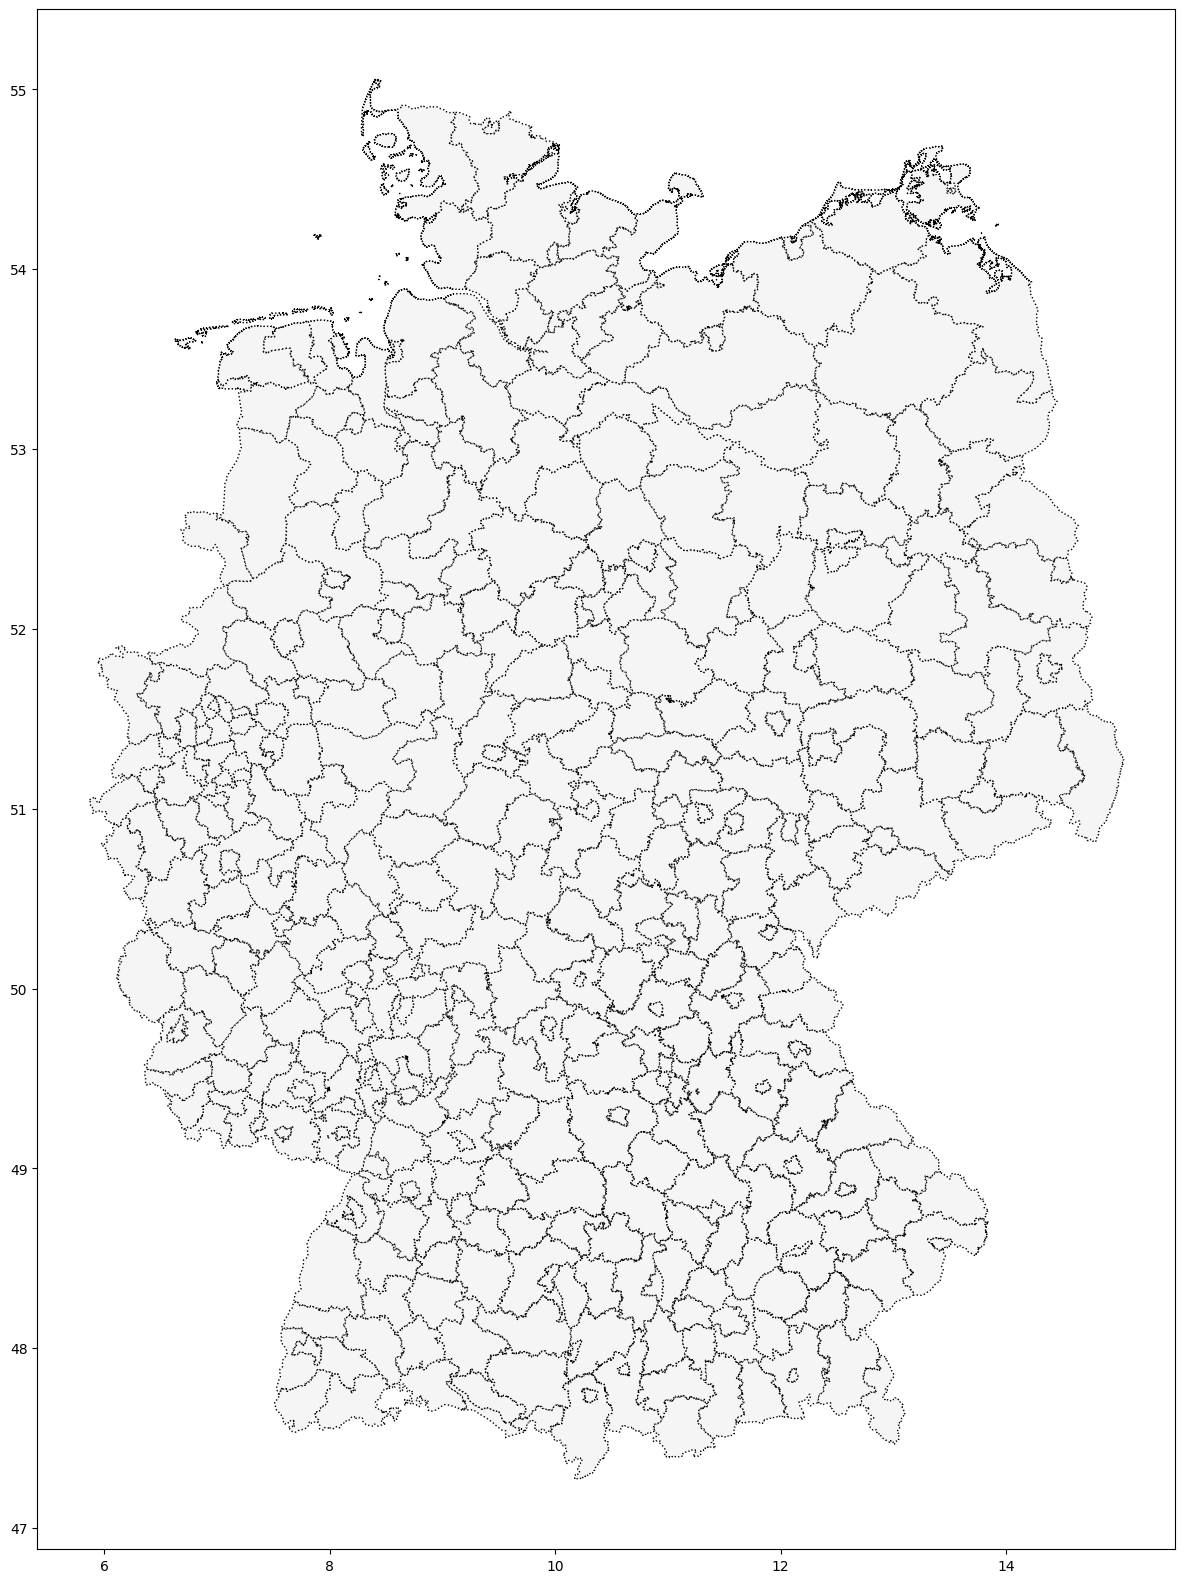

In [856]:
# Load a GeoDataFrame containing departments in France
regions_level2 = gpd.read_file("../country_boundaries/gadm41_DEU_shp/gadm41_DEU_2.shp")
regions_level2.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')

<Axes: >

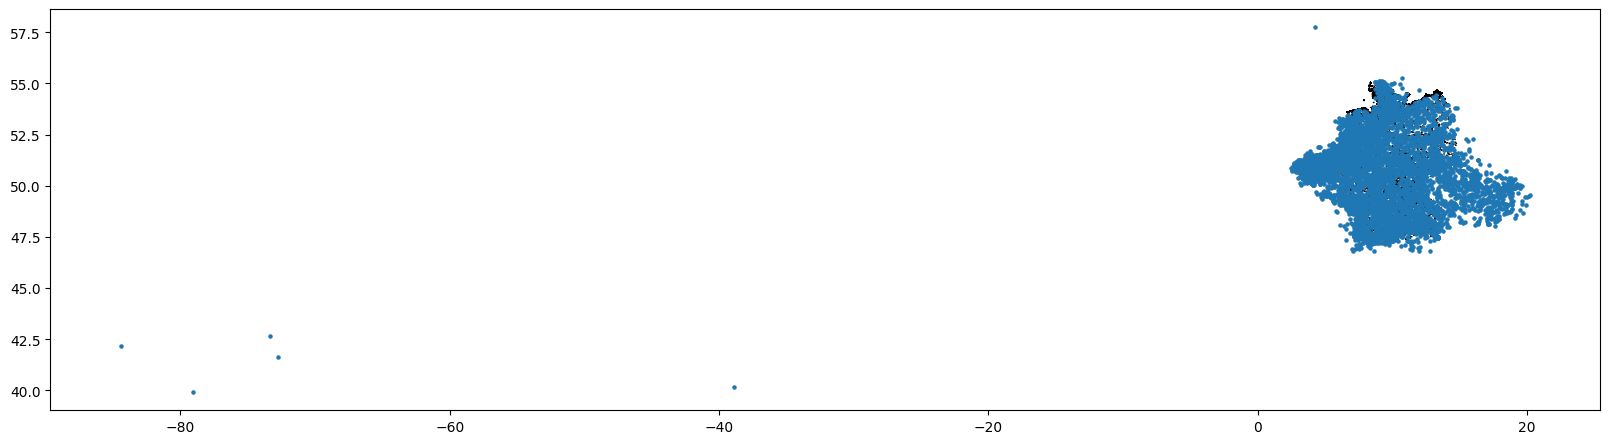

In [857]:
# Create a map
ax = regions_level2.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.plot(markersize=5, ax=ax)

<Axes: >

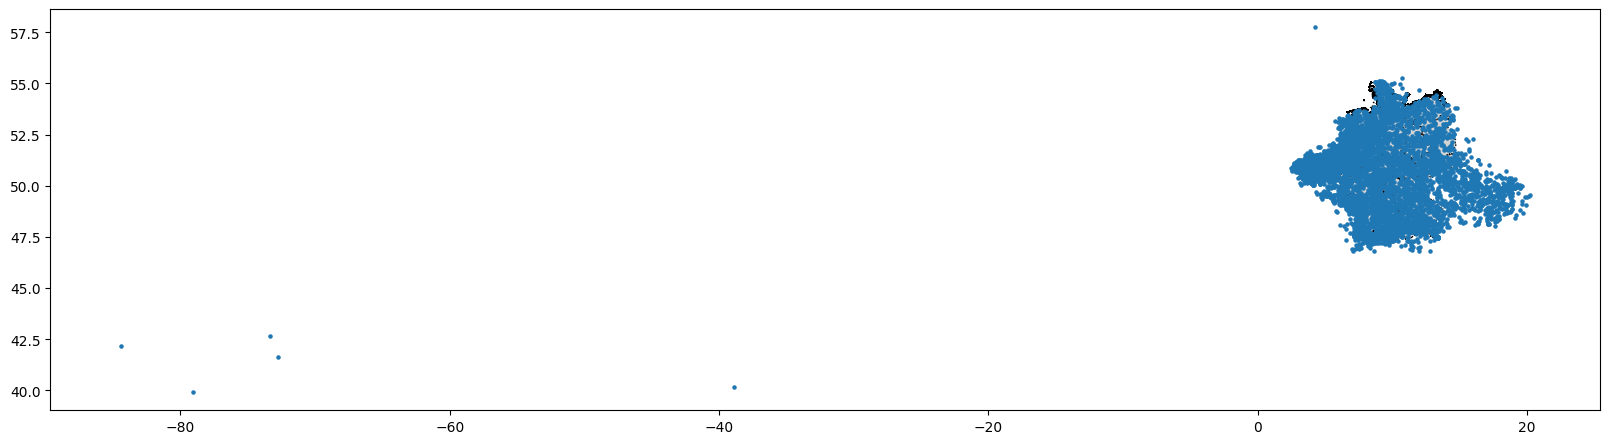

In [858]:
# Load a GeoDataFrame containing regions in France
regions_level1 = gpd.read_file("../country_boundaries/gadm41_DEU_shp/gadm41_DEU_1.shp")

# Create the map with both layers
ax = regions_level1.plot(figsize=(20,20), color='lightgrey', linestyle=':', edgecolor='black')
facilities.plot(markersize=5, ax=ax)

In [859]:
regions_level1.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,DEU.1_1,DEU,Germany,Baden-Württemberg,NA,NA,Land,State,08,DE.BW,NA,"MULTIPOLYGON (((8.35002 47.57062, 8.34778 47.5..."
1,DEU.2_1,DEU,Germany,Bayern,Bavaria,NA,Freistaat,Free State,09,DE.BY,DE-BY,"POLYGON ((11.41009 47.49540, 11.41005 47.49536..."
2,DEU.3_1,DEU,Germany,Berlin,NA,NA,Land,State,11,DE.BE,DE-BE,"POLYGON ((13.50022 52.61379, 13.49855 52.61068..."
3,DEU.4_1,DEU,Germany,Brandenburg,NA,NA,Land,State,12,DE.BR,DE-BB,"MULTIPOLYGON (((13.32220 51.43674, 13.32402 51..."
4,DEU.5_1,DEU,Germany,Bremen,NA,NA,Freie Hansestadt,State,04,DE.HB,DE-HB,"MULTIPOLYGON (((8.67501 53.17805, 8.67532 53.1..."


In [860]:
# Perform a spatial join to assign each farm to a region
joined_gdf = gpd.sjoin(facilities, regions_level2, how="left", op="within")

# Check for null values in the COUNTRY column
joined_gdf.isnull().sum()

/Users/rodrigoazevedo/repos/geopandas/.venv/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3517: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/kj/s6p553_17zxd38q2s490jgr80000gn/T/ipykernel_43599/3959565662.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  joined_gdf = gpd.sjoin(facilities, regions_level2, how="left", op="within")


name                0
website          3391
main_category       0
categories          0
phone            1390
owner               0
address            17
coordinates         0
link                0
latitude            0
longitude           0
animal_type         0
geometry            0
index_right      2783
GID_2            2783
GID_0            2783
COUNTRY          2783
GID_1            2783
NAME_1           2783
NL_NAME_1        2783
NAME_2           2783
VARNAME_2        2783
NL_NAME_2        2783
TYPE_2           2783
ENGTYPE_2        2783
CC_2             2783
HASC_2           2783
dtype: int64

In [861]:
joined_gdf = joined_gdf.dropna(subset=['COUNTRY'])
# Aggregate farms by region and count the number of farms in each region
farms_by_region = joined_gdf.groupby('NAME_1')['name'].count()
farms_by_region.head()


NAME_1
Baden-Württemberg    392
Bayern               721
Berlin                22
Brandenburg          137
Bremen                 8
Name: name, dtype: int64

In [862]:

# Aggregate farms by department and count the number of farms in each department
farms_by_department = joined_gdf.groupby('NAME_2')['name'].count()
farms_by_department.head()


NAME_2
Ahrweiler                     6
Aichach-Friedberg            12
Alb-Donau-Kreis              16
Altenburger Land              4
Altenkirchen (Westerwald)    12
Name: name, dtype: int64

In [863]:
# Select only the desired columns
desired_columns = ["COUNTRY", 'NAME_1', 'NAME_2']
joined_gdf_filtered = joined_gdf[desired_columns]
# Merge the filtered spatial join result with the original facilities DataFrame
joined_gdf_final = facilities.merge(joined_gdf_filtered, left_index=True, right_index=True)

In [864]:
# Check for null values in the COUNTRY column
joined_gdf.isnull().sum()

name                0
website          1603
main_category       0
categories          0
phone             672
owner               0
address             8
coordinates         0
link                0
latitude            0
longitude           0
animal_type         0
geometry            0
index_right         0
GID_2               0
GID_0               0
COUNTRY             0
GID_1               0
NAME_1              0
NL_NAME_1           0
NAME_2              0
VARNAME_2           0
NL_NAME_2           0
TYPE_2              0
ENGTYPE_2           0
CC_2                0
HASC_2              0
dtype: int64

In [865]:
joined_gdf_final.NAME_1.value_counts()

NAME_1
Bayern                    721
Nordrhein-Westfalen       543
Niedersachsen             498
Baden-Württemberg         392
Hessen                    247
Schleswig-Holstein        184
Sachsen                   182
Rheinland-Pfalz           158
Brandenburg               137
Thüringen                 131
Mecklenburg-Vorpommern    128
Sachsen-Anhalt             98
Saarland                   28
Berlin                     22
Hamburg                    12
Bremen                      8
Name: count, dtype: int64

In [866]:
joined_gdf_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3489 entries, 0 to 6269
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           3489 non-null   object  
 1   website        1886 non-null   object  
 2   main_category  3489 non-null   object  
 3   categories     3489 non-null   object  
 4   phone          2817 non-null   object  
 5   owner          3489 non-null   object  
 6   address        3481 non-null   object  
 7   coordinates    3489 non-null   object  
 8   link           3489 non-null   object  
 9   latitude       3489 non-null   float64 
 10  longitude      3489 non-null   float64 
 11  animal_type    3489 non-null   object  
 12  geometry       3489 non-null   geometry
 13  COUNTRY        3489 non-null   object  
 14  NAME_1         3489 non-null   object  
 15  NAME_2         3489 non-null   object  
dtypes: float64(2), geometry(1), object(13)
memory usage: 463.4+ KB


<Axes: >

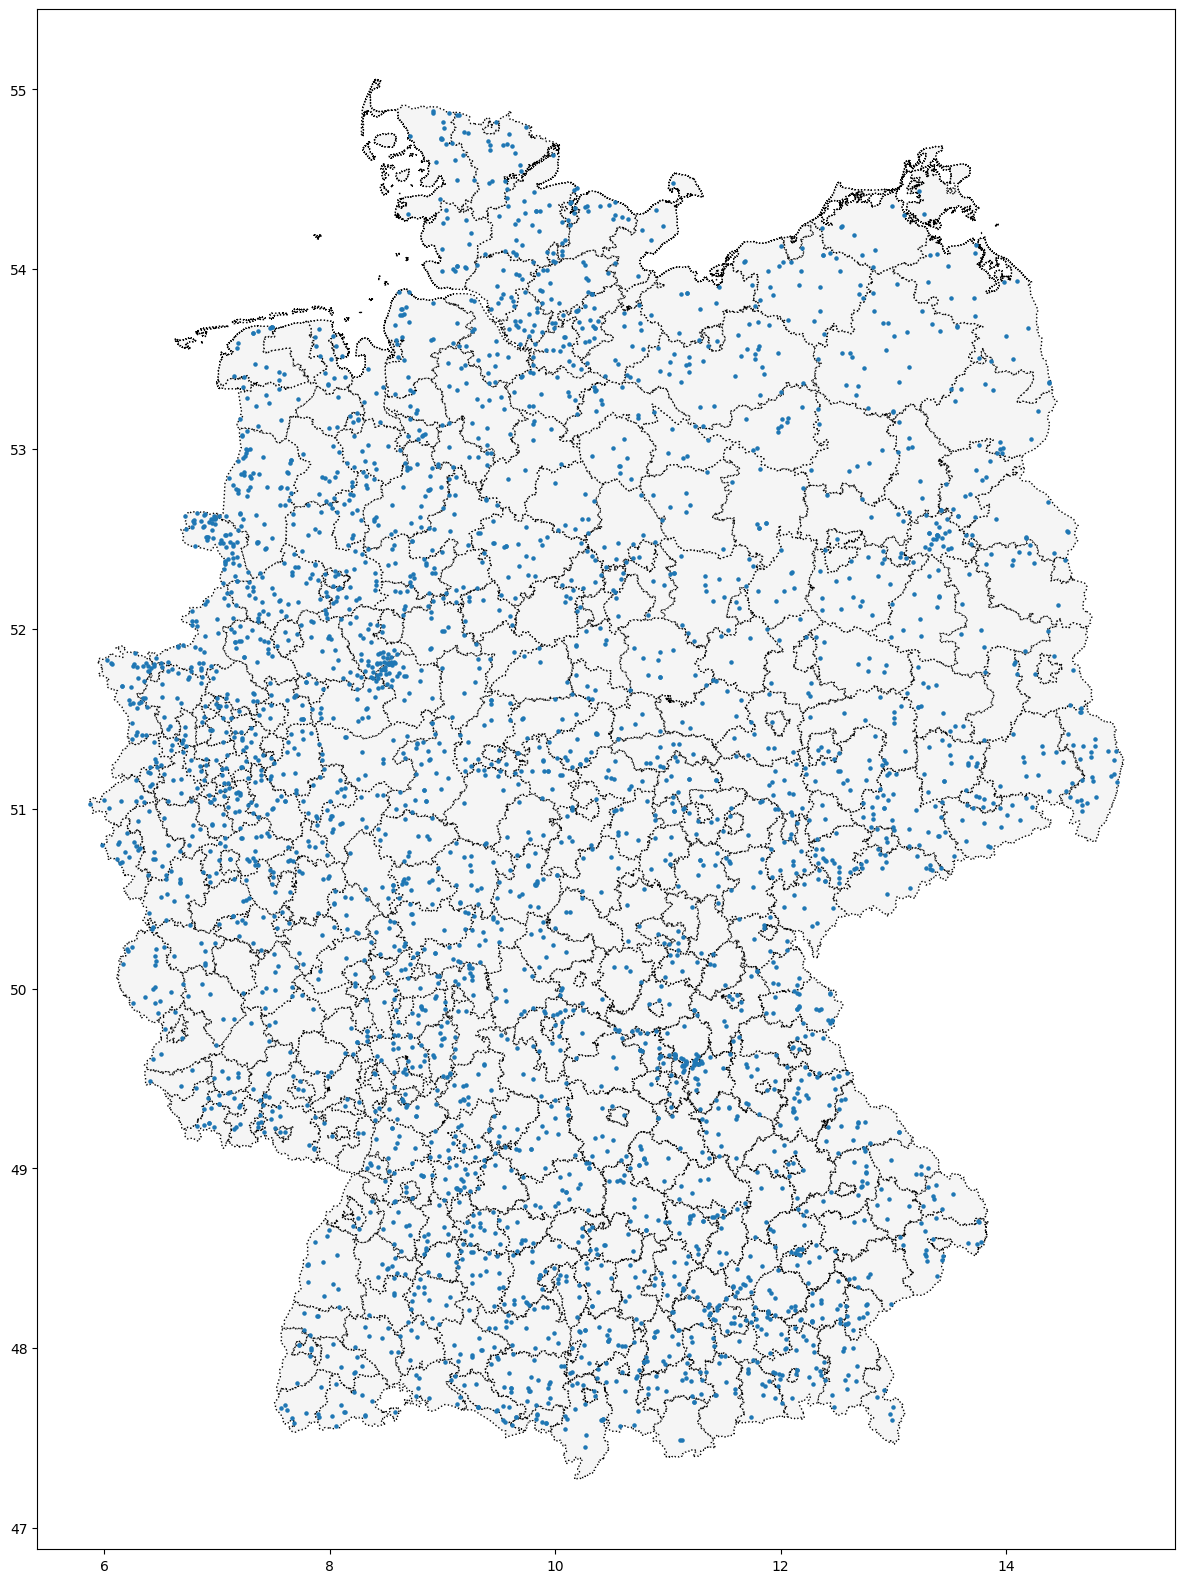

In [867]:
# Create a map
ax = regions_level2.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
joined_gdf_final.plot(markersize=5, ax=ax)


<Axes: >

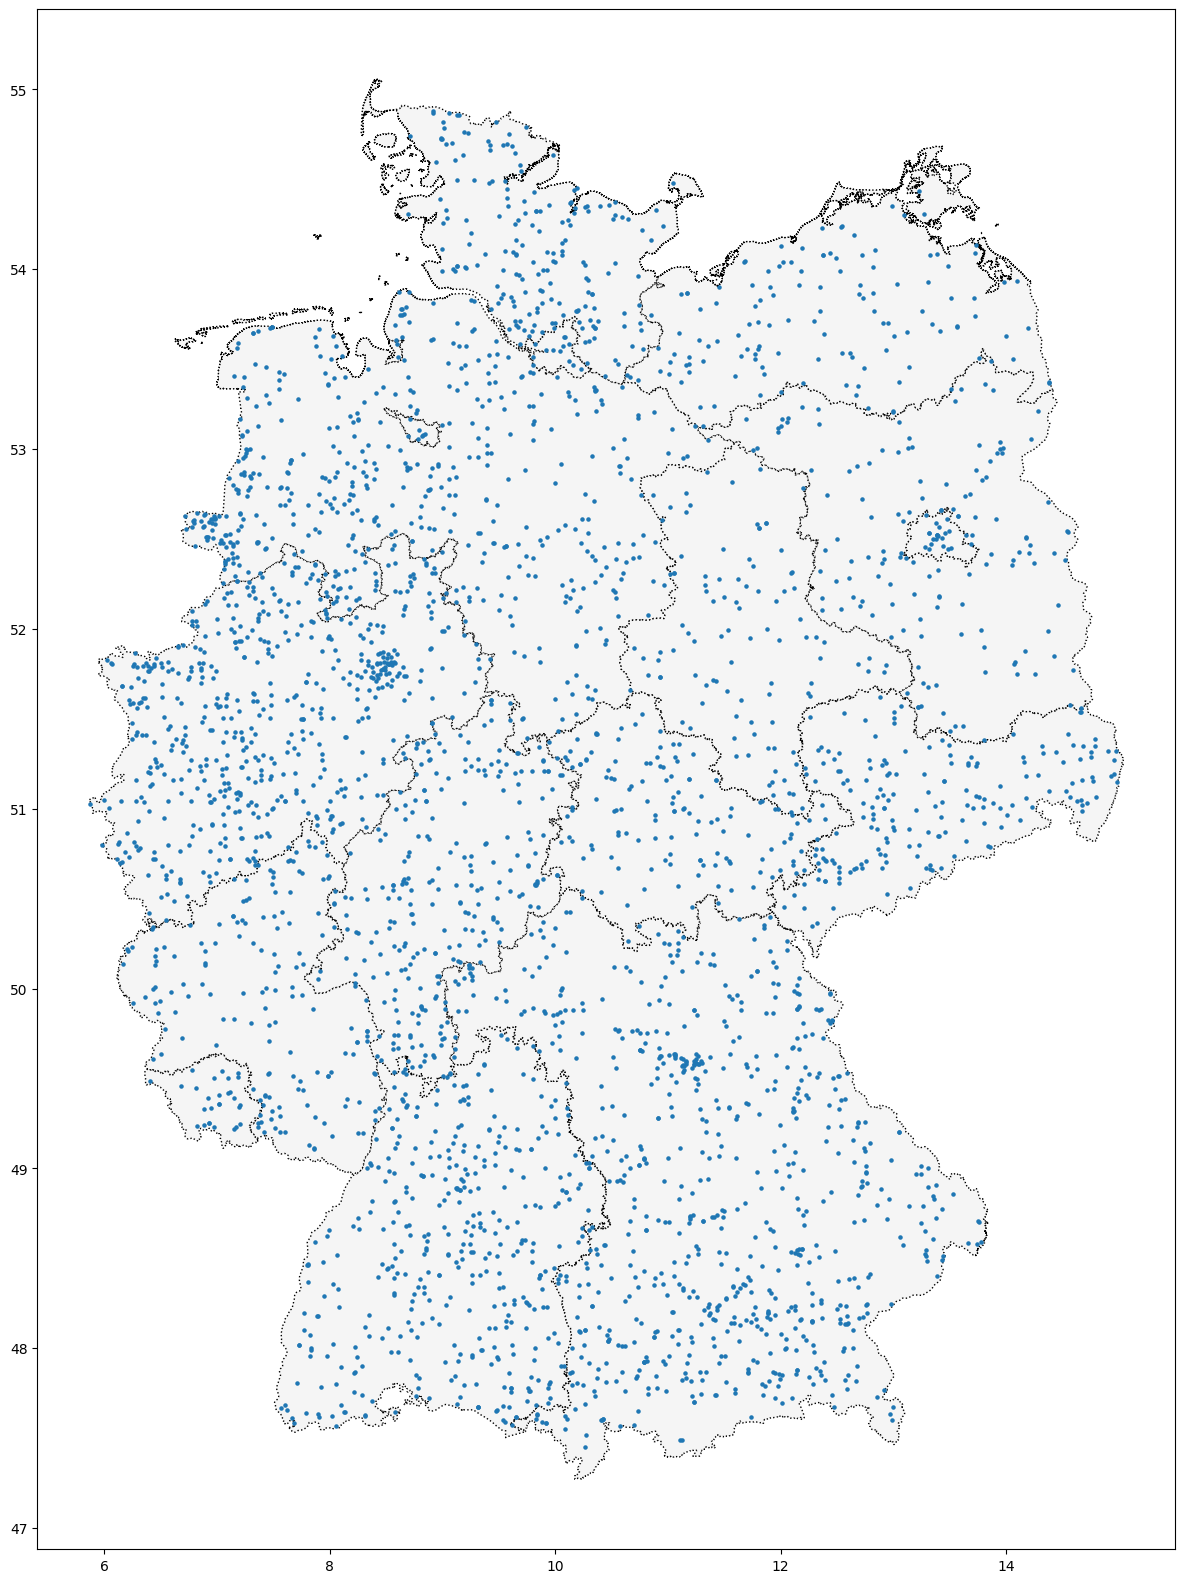

In [868]:

# Create a map
ax = regions_level1.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black', zorder=1)

# Plot farms in each region with assigned colors
joined_gdf_final.plot(markersize=5, ax=ax)

0     Annotation(9.04909, 48.5375, 'Baden-Württemberg')
1                  Annotation(11.42, 48.9478, 'Bayern')
2                Annotation(13.4019, 52.5015, 'Berlin')
3           Annotation(13.3978, 52.4729, 'Brandenburg')
4                Annotation(8.74464, 53.1977, 'Bremen')
5               Annotation(10.0208, 53.5464, 'Hamburg')
6                Annotation(9.03105, 50.6032, 'Hessen')
7     Annotation(12.554, 53.754, 'Mecklenburg-Vorpom...
8         Annotation(9.15923, 52.7659, 'Niedersachsen')
9     Annotation(7.56208, 51.4797, 'Nordrhein-Westfa...
10      Annotation(7.44911, 49.9137, 'Rheinland-Pfalz')
11             Annotation(6.95314, 49.3844, 'Saarland')
12              Annotation(13.3486, 51.0523, 'Sachsen')
13       Annotation(11.7007, 52.0132, 'Sachsen-Anhalt')
14    Annotation(9.81008, 54.1829, 'Schleswig-Holste...
15            Annotation(11.0249, 50.9039, 'Thüringen')
dtype: object

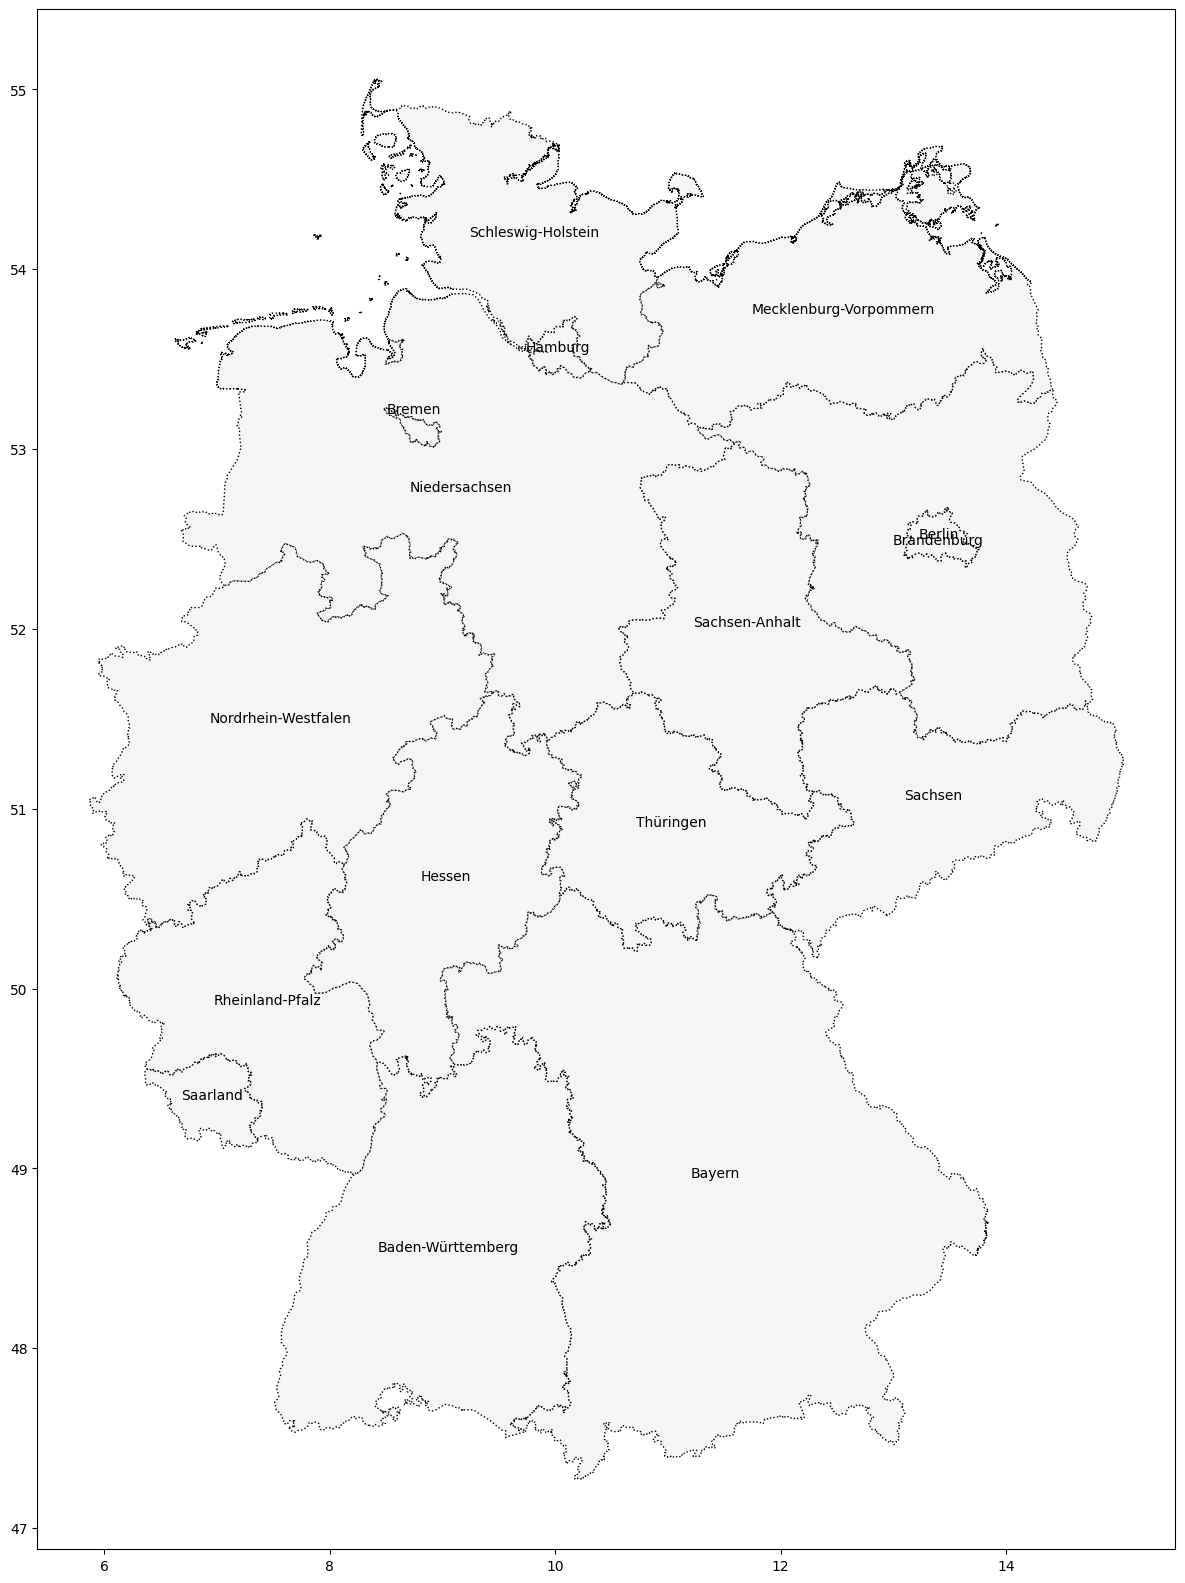

In [869]:
# create a map with the names of the regions
ax = regions_level1.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black', zorder=1)
regions_level1.apply(lambda x: ax.annotate(text=x.NAME_1, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)



In [870]:
joined_gdf_final.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3489 entries, 0 to 6269
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           3489 non-null   object  
 1   website        1886 non-null   object  
 2   main_category  3489 non-null   object  
 3   categories     3489 non-null   object  
 4   phone          2817 non-null   object  
 5   owner          3489 non-null   object  
 6   address        3481 non-null   object  
 7   coordinates    3489 non-null   object  
 8   link           3489 non-null   object  
 9   latitude       3489 non-null   float64 
 10  longitude      3489 non-null   float64 
 11  animal_type    3489 non-null   object  
 12  geometry       3489 non-null   geometry
 13  COUNTRY        3489 non-null   object  
 14  NAME_1         3489 non-null   object  
 15  NAME_2         3489 non-null   object  
dtypes: float64(2), geometry(1), object(13)
memory usage: 463.4+ KB


In [871]:
# Save the final GeoDataFrame to a csv file
joined_gdf_final.to_csv('processed_data/germany_cleaned.csv', index=False)